In [4]:
import numpy as np
import pandas as pd

from collections import Counter
from collections import OrderedDict
import missingno 


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import statsmodels.api as sm
from scipy import stats

In [7]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg

In [9]:
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset = pd.read_csv('car.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [12]:
dataset.shape
(157, 16)

(157, 16)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
dataset.Fuel_Type = dataset.Fuel_Type.astype('category')
dataset.Car_Name = dataset.Car_Name.astype('category')
dataset.Year = dataset.Year.astype('object')
dataset.Selling_Price=dataset.Selling_Price.astype('float')
dataset.Owner=dataset.Owner.astype('object')
dataset.Kms_Driven=dataset.Kms_Driven.astype('float')
dataset.Seller_Type=dataset.Seller_Type.astype('object')
dataset.Transmission=dataset.Transmission.astype('object')
dataset.Present_Price=dataset.Present_Price.astype('float')



In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    object  
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    float64 
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    object  
 7   Transmission   301 non-null    object  
 8   Owner          301 non-null    object  
dtypes: category(2), float64(3), object(4)
memory usage: 20.1+ KB


In [16]:
dataset.describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


In [17]:
car_count = dataset['Car_Name'].value_counts(dropna = False)
car_count

Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64

In [18]:
plt.figure(figsize = (225, 50))
sns.barplot(car_count, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Car_Name')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Car_Name', fontsize = 11)
plt.show()

In [19]:
mean_car_price = dataset[['Car_Name', 'Selling_Price']].groupby('Car_Name', as_index = False).mean()
mean_car_price

,Car_Name,Selling_Price
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


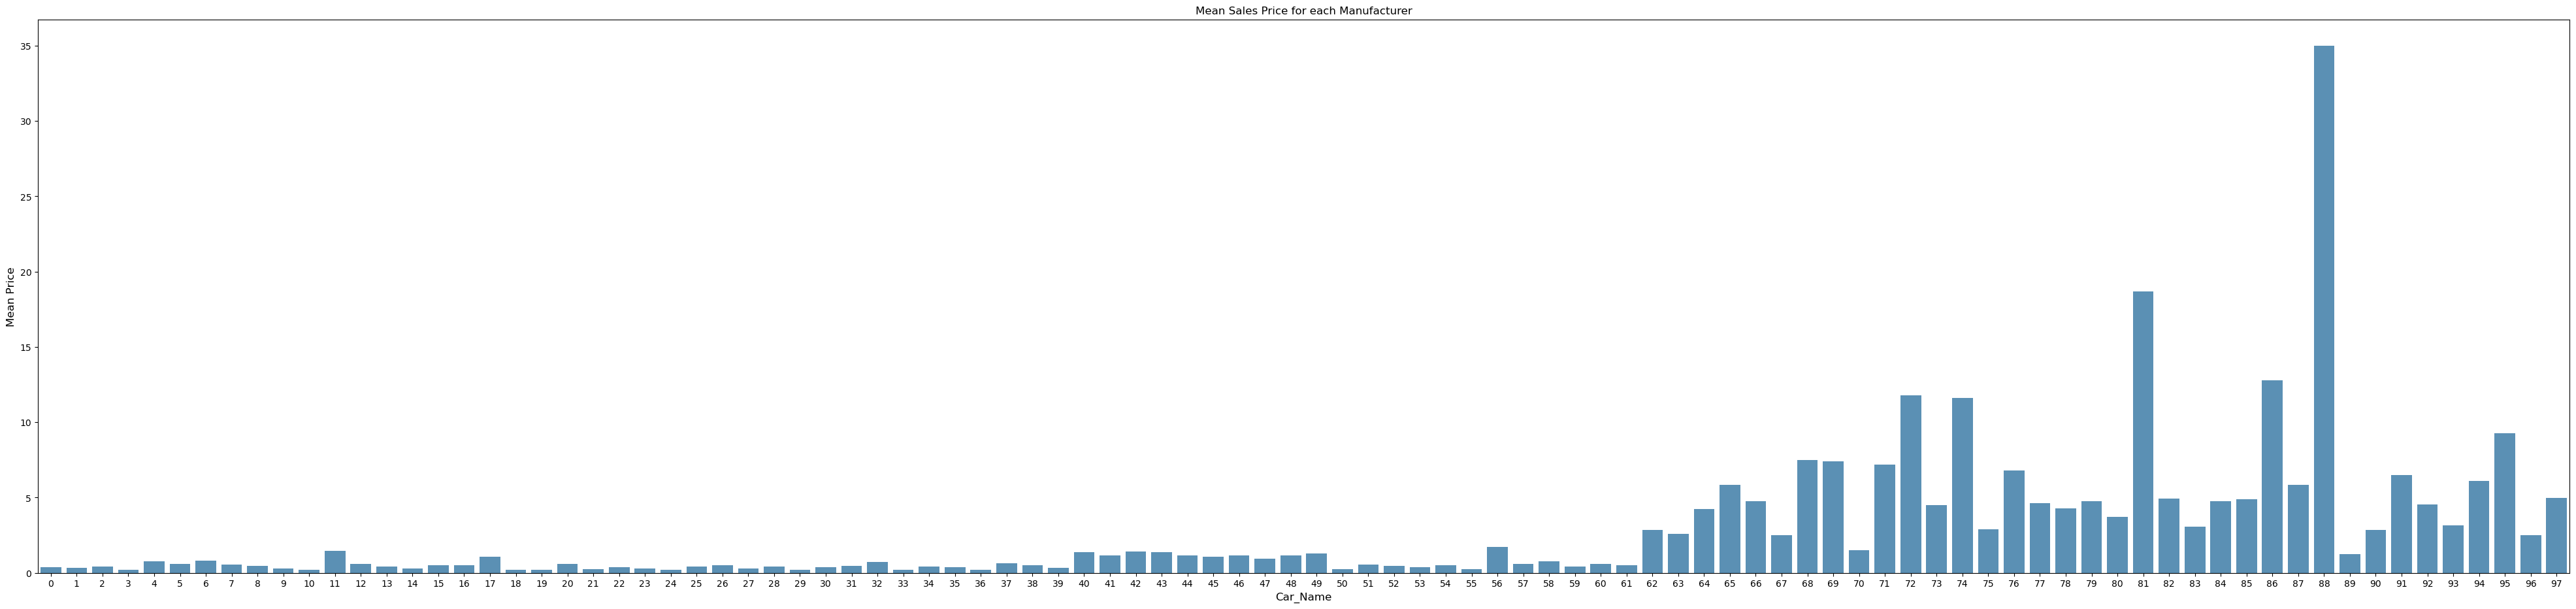

In [20]:
plt.figure(figsize = (50, 11))
sns.barplot( mean_car_price['Selling_Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Manufacturer')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Car_Name', fontsize = 12)
plt.show()

In [21]:
vehicle_type_total= dataset['Fuel_Type'].value_counts(dropna = False)
vehicle_type_total

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

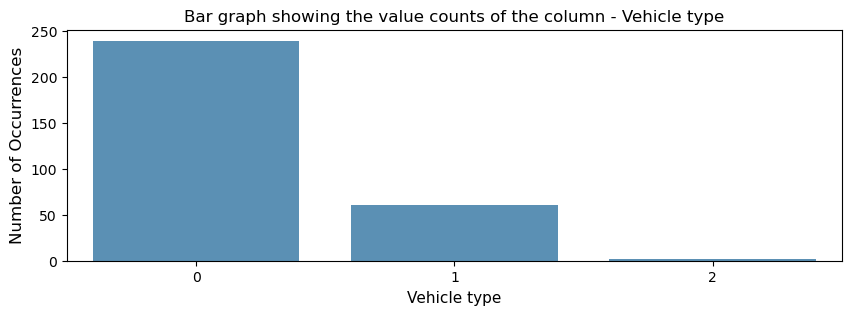

In [22]:
plt.figure(figsize = (10, 3))
sns.barplot( vehicle_type_total.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 11)
plt.show()

In [23]:
mean_price_vehicle = dataset[['Fuel_Type', 'Selling_Price']].groupby('Fuel_Type', as_index = False).mean()
mean_price_vehicle

,Fuel_Type,Selling_Price
0,CNG,3.100000
1,Diesel,10.278500
2,Petrol,3.264184


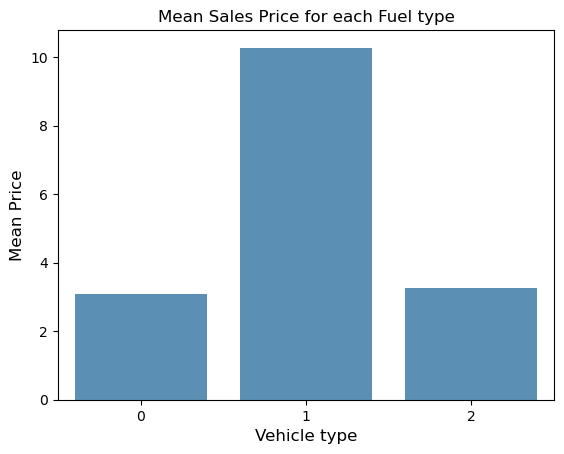

In [24]:
sns.barplot(mean_price_vehicle['Selling_Price'].values, alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.show()

In [25]:
Years=dataset['Year'].value_counts(dropna=False)
Years


Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [26]:
Years_of_Service = dataset[['Car_Name', 'Year']].groupby('Car_Name', as_index = False).mean()
Years_of_Service

,Car_Name,Year
0,800,2003.0
1,Activa 3g,2012.0
2,Activa 4g,2017.0
3,Bajaj ct 100,2015.0
4,Bajaj Avenger 150,2016.0
...,...,...
93,sx4,2009.333333
94,verna,2013.571429
95,vitara brezza,2018.0
96,wagon r,2011.25


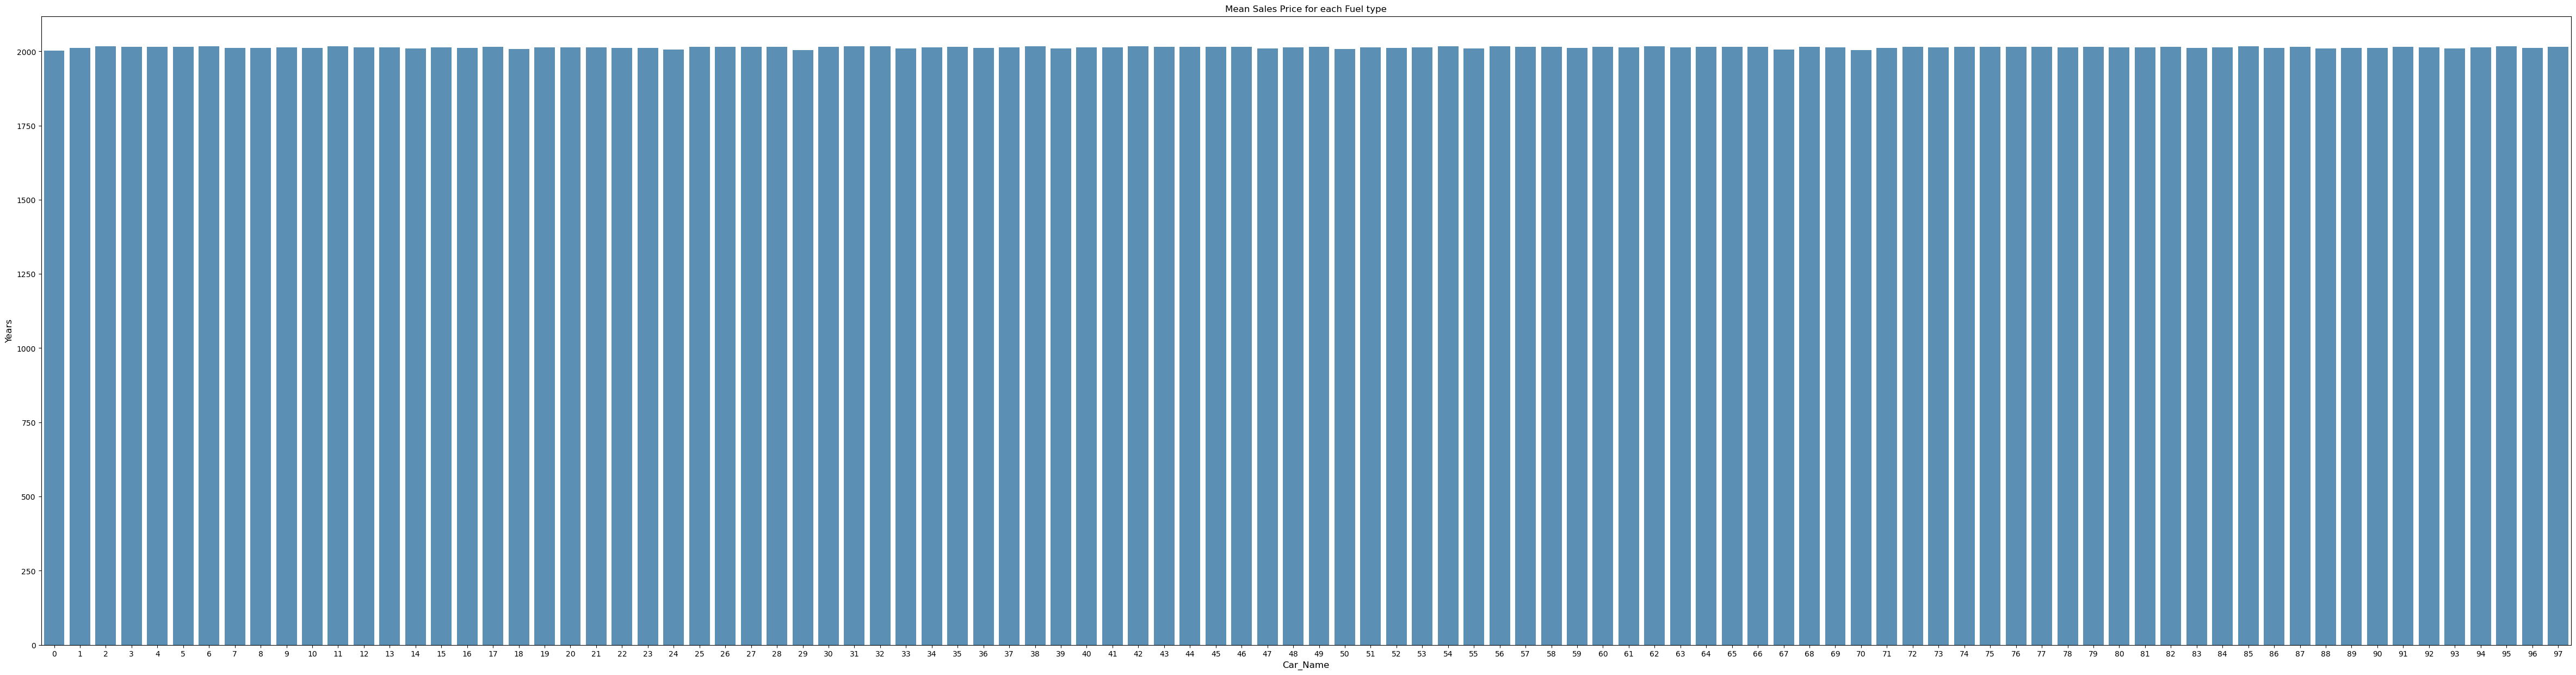

In [27]:
plt.figure(figsize = (60,15))
sns.barplot(Years_of_Service['Year'].values, alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Years', fontsize = 12)
plt.xlabel('Car_Name', fontsize = 12)
plt.show()

In [28]:
Owners=dataset['Owner'].value_counts(dropna=False)
Owners


Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [29]:
No_of_Owners= dataset[['Car_Name', 'Owner']].groupby('Car_Name', as_index = False).max()
No_of_Owners

,Car_Name,Owner
0,800,0
1,Activa 3g,0
2,Activa 4g,0
3,Bajaj ct 100,0
4,Bajaj Avenger 150,0
...,...,...
93,sx4,0
94,verna,0
95,vitara brezza,0
96,wagon r,0


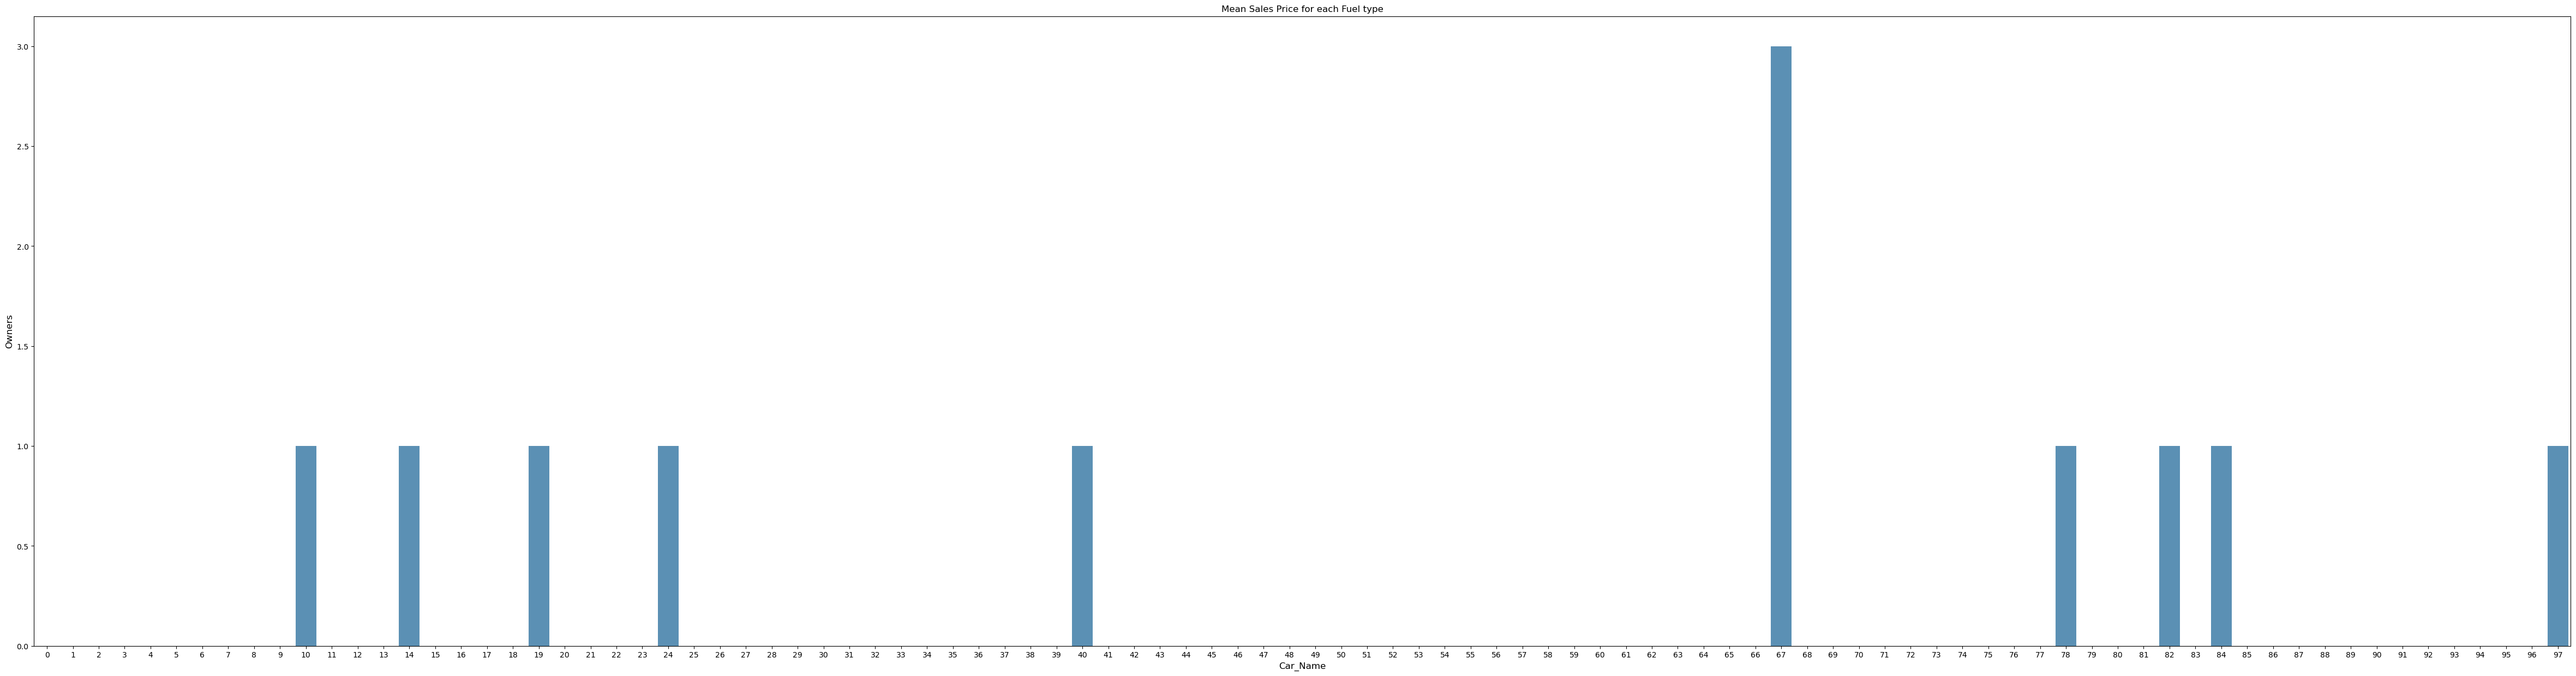

In [30]:
plt.figure(figsize = (60,15))
sns.barplot(No_of_Owners['Owner'].values, alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Owners', fontsize = 12)
plt.xlabel('Car_Name', fontsize = 12)
plt.show()

In [31]:
kilometers=dataset['Kms_Driven'].value_counts(dropna=False)
kilometers

Kms_Driven
45000.0    9
15000.0    9
40000.0    5
35000.0    5
50000.0    5
          ..
1400.0     1
1200.0     1
4100.0     1
21700.0    1
5464.0     1
Name: count, Length: 206, dtype: int64

In [32]:
kilometers_driven=dataset[['Car_Name','Kms_Driven']].groupby('Car_Name', as_index = False).max()
kilometers_driven

,Car_Name,Kms_Driven
0,800,127000.0
1,Activa 3g,500000.0
2,Activa 4g,1300.0
3,Bajaj ct 100,35000.0
4,Bajaj Avenger 150,7000.0
...,...,...
93,sx4,62000.0
94,verna,71000.0
95,vitara brezza,2071.0
96,wagon r,65000.0


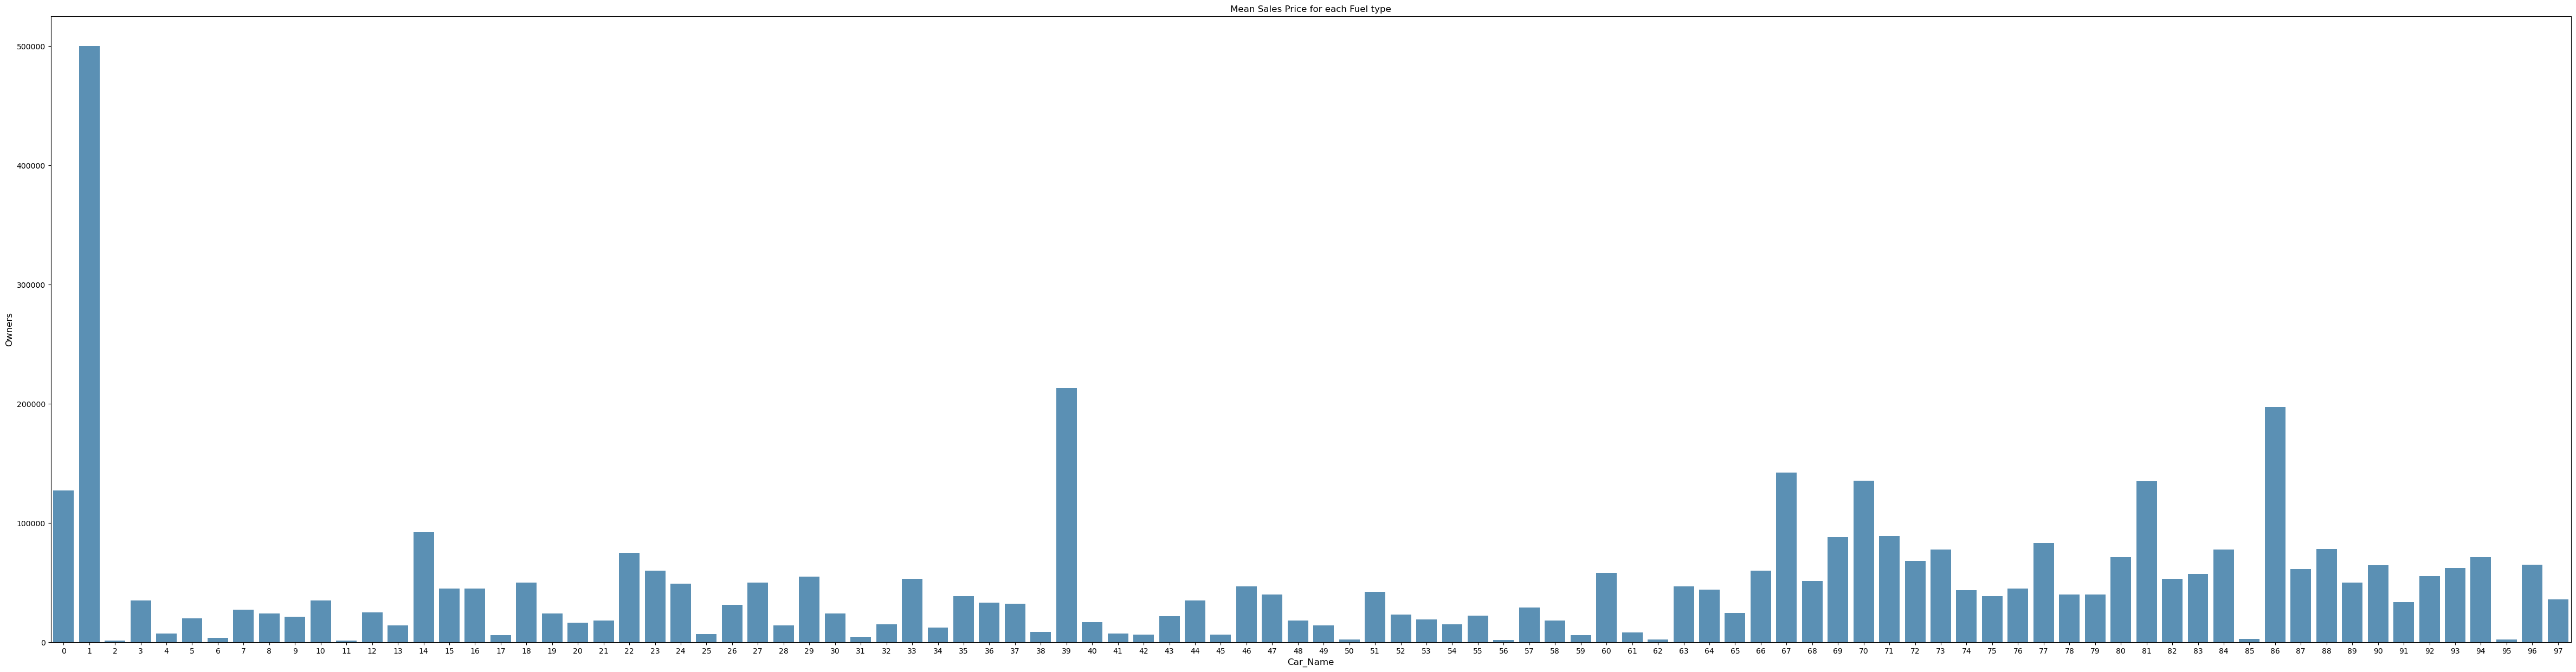

In [33]:
plt.figure(figsize = (60,15))
sns.barplot(kilometers_driven['Kms_Driven'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Owners', fontsize = 12)
plt.xlabel('Car_Name', fontsize = 12)
plt.show()

In [34]:
seller=dataset['Seller_Type'].value_counts(dropna=False)
seller

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [35]:
seller_Type=dataset[['Car_Name','Seller_Type']].groupby('Car_Name', as_index = False).min()
seller_Type

,Car_Name,Seller_Type
0,800,Individual
1,Activa 3g,Individual
2,Activa 4g,Individual
3,Bajaj ct 100,Individual
4,Bajaj Avenger 150,Individual
...,...,...
93,sx4,Dealer
94,verna,Dealer
95,vitara brezza,Dealer
96,wagon r,Dealer


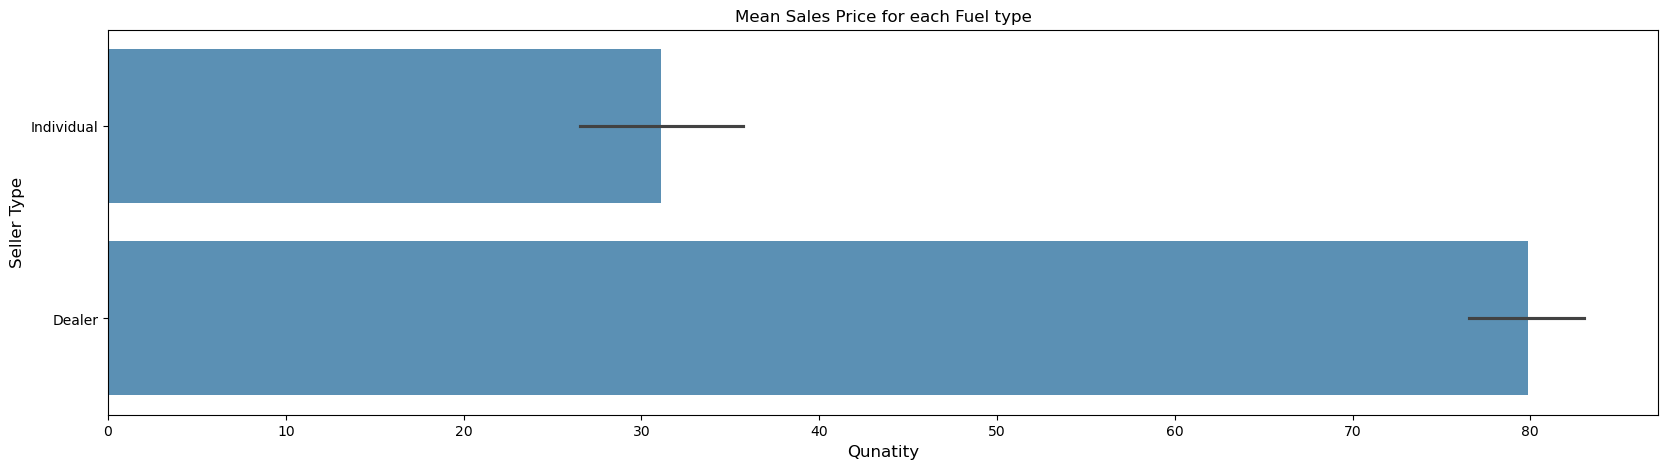

In [36]:
plt.figure(figsize = (20,5))
sns.barplot(seller_Type['Seller_Type'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Seller Type', fontsize = 12)
plt.xlabel('Qunatity', fontsize = 12)
plt.show()

In [37]:
transmission=dataset['Transmission'].value_counts(dropna=False)
transmission

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [38]:
transmission_Type=dataset[['Car_Name','Transmission']].groupby('Car_Name',as_index=False).max()
transmission_Type

,Car_Name,Transmission
0,800,Manual
1,Activa 3g,Automatic
2,Activa 4g,Automatic
3,Bajaj ct 100,Manual
4,Bajaj Avenger 150,Manual
...,...,...
93,sx4,Manual
94,verna,Manual
95,vitara brezza,Manual
96,wagon r,Manual


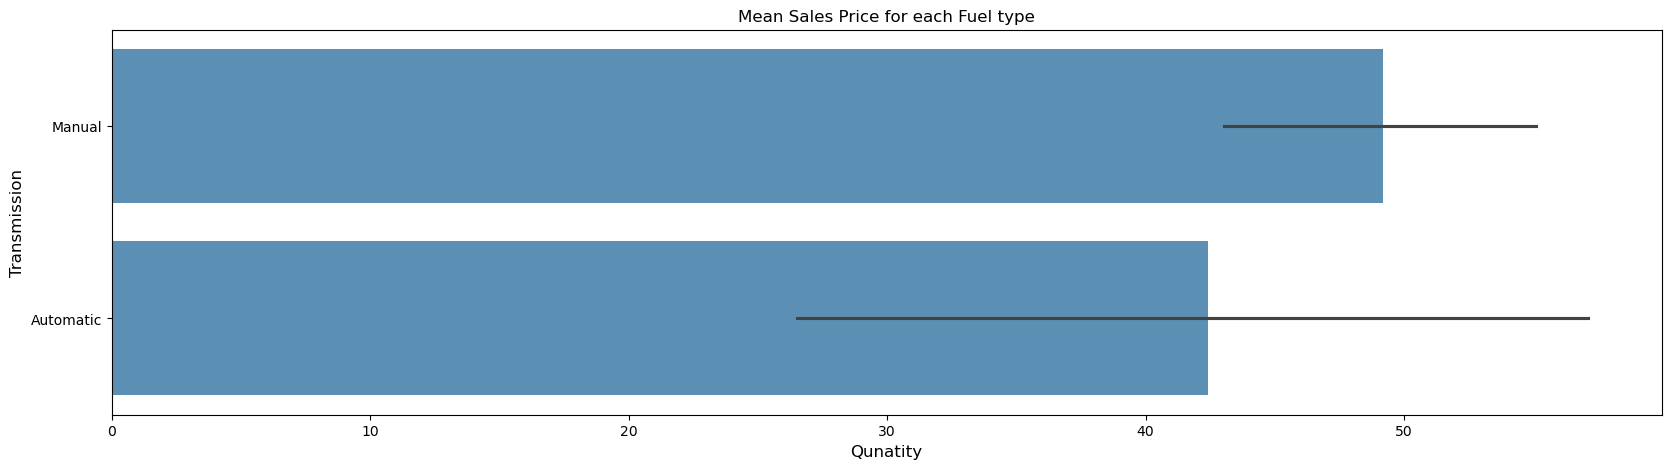

In [39]:
plt.figure(figsize = (20,5))
sns.barplot(transmission_Type['Transmission'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Transmission', fontsize = 12)
plt.xlabel('Qunatity', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Distribution of the column - Selling Price')

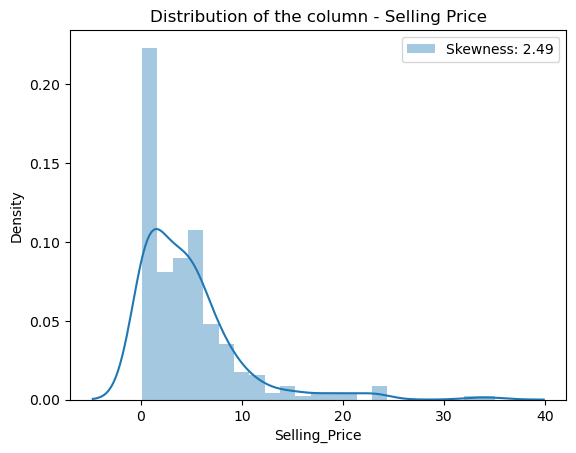

In [40]:
sns.distplot(dataset['Selling_Price'], label = 'Skewness: %.2f'%(dataset['Selling_Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Selling Price')

Text(0.5, 1.0, 'Distribution of the column - Kms Driven')

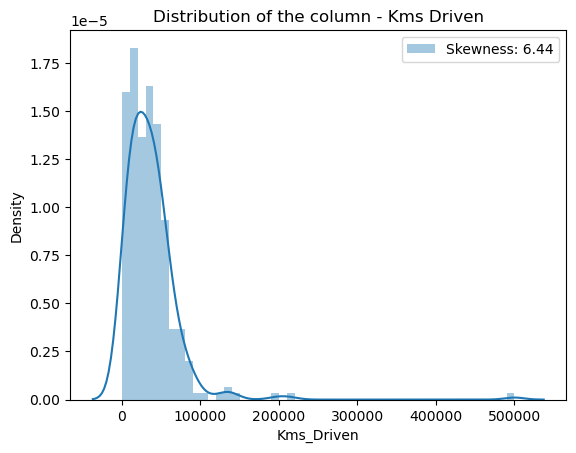

In [41]:
sns.distplot(dataset['Kms_Driven'], label = 'Skewness: %.2f'%(dataset['Kms_Driven'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Kms Driven')

Text(0.5, 1.0, 'Distribution of the column - Sales in thousands')

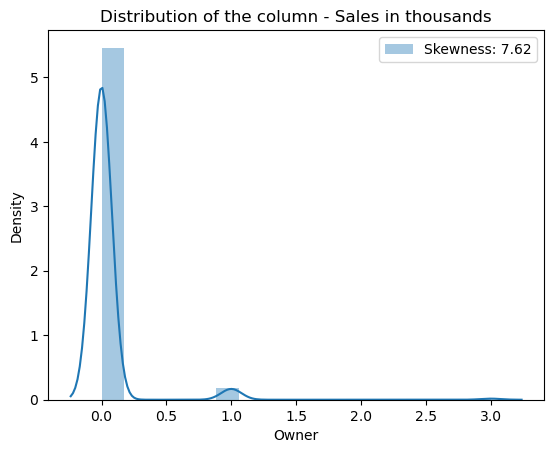

In [42]:
sns.distplot(dataset['Owner'], label = 'Skewness: %.2f'%(dataset['Owner'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales in thousands')